<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/variacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
import sympy as sp
x = sp.symbols('x')
u = sp.Function('u')
b1 = sp.Function('b1')
b2 = sp.Function('b2')

In [4]:
ode = u(x).diff(x, x) + u(x) - x**2
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x**2 - 2)

In [5]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})
sol


Eq(u(x), x**2 + (1 - 2*cos(1))*sin(x)/sin(1) + 2*cos(x) - 2)

In [6]:
ode = u(x).diff(x, x) + u(x) + x
sp.dsolve(ode, u(x))


Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [7]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})
sol

Eq(u(x), -x + sin(x)/sin(1))

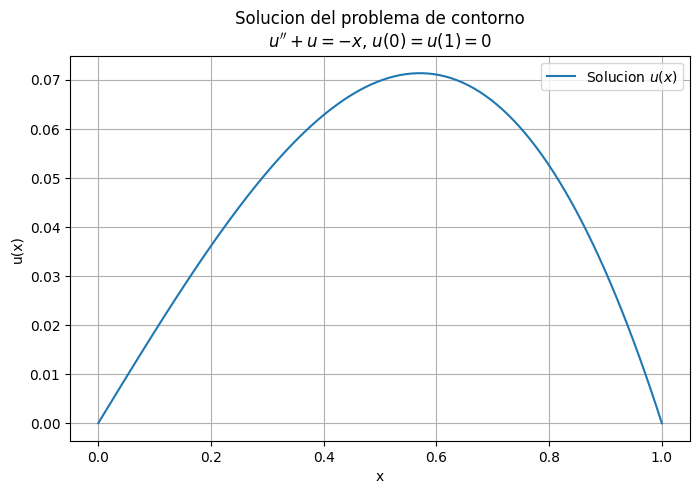

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# convertimos en un arreglo de numpy
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solucion $u(x)$")
plt.title("Solucion del problema de contorno\n$u'' + u = -x$, $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

METODO NUMERICO

In [11]:
b1 = x*(1-x)
b2 = x**2*(1-x)


In [12]:
db1 = b1.diff(x)
db2 = b2.diff(x)

In [13]:
-db1**2+b1**2

x**2*(1 - x)**2 - (1 - 2*x)**2

In [16]:
K11 = sp.integrate(-db1*db1+b1*b1, (x, 0, 1))
K12 = sp.integrate(-db1*db2+b1*b2, (x, 0, 1))
K21 = sp.integrate(-db2*db1+b2*b1, (x, 0, 1))
K22 = sp.integrate(-db2*db2+b2*b2, (x, 0, 1))

In [17]:
print(K11,K12,K21,K22)

-3/10 -3/20 -3/20 -13/105


In [20]:
K=sp.Matrix([[K11,K12],
             [K12, K22]])

In [21]:
K

Matrix([
[-3/10,   -3/20],
[-3/20, -13/105]])

In [22]:
F1= sp.integrate(x**2*b1, (x, 0, 1))
F2= sp.integrate(x**2*b2, (x, 0, 1))
print(F1, F2)

1/20 1/30


In [23]:
F= sp.Matrix([[F1],[F2]])
F

Matrix([
[1/20],
[1/30]])

In [24]:
s=K.solve(F)
s

Matrix([
[-10/123],
[  -7/41]])

In [25]:
A1=s[0]
A1

-10/123